# Exercises Part I

### Use pandas to create a Series named fruits from the following list:

In [90]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple",
          "honeycrisp apple", "tomato", "watermelon", "honeydew",
          "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry",
          "gooseberry", "papaya"])
print(fruits)
print(type(fruits))

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object
<class 'pandas.core.series.Series'>


### Use Series attributes and methods to explore your fruits Series:

#### 1. Determine the number of elements in fruits.

In [5]:
fruits.size

17

RangeIndex(start=0, stop=17, step=1)

In [7]:
print(fruits.index)

RangeIndex(start=0, stop=17, step=1)


#### 2. Output only the index from fruits.

In [10]:
print(fruits.index)
print(list(fruits.index))
print(fruits.index.values)

RangeIndex(start=0, stop=17, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


#### 3. Output only the values from fruits.

In [11]:
fruits.values

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew', 'kiwi',
       'kiwi', 'kiwi', 'mango', 'blueberry', 'blackberry', 'gooseberry',
       'papaya'], dtype=object)

#### 4. Confirm the data type of the values in fruits.

In [13]:
fruits.values.dtype

dtype('O')

#### 5. Output only the first five values from fruits. Output the last three values. Output two random values from fruits.

In [20]:
print(f'{fruits.head()}\n')
print(f'{fruits.tail(3)}\n')
print(fruits.sample(2))

0          kiwi
1         mango
2    strawberry
3     pineapple
4    gala apple
dtype: object

14    blackberry
15    gooseberry
16        papaya
dtype: object

13    blueberry
9          kiwi
dtype: object


#### 6. Run the .describe() on fruits to see what information it returns when called on a Series with string values.

In [21]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

#### 7. Run the code necessary to produce only the unique string values from fruits.

In [22]:
fruits.describe()['unique']

13

#### 8. Determine how many times each unique string value occurs in fruits.

In [23]:
fruits.value_counts()

kiwi                4
mango               2
strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

#### 9. Determine the string value that occurs most frequently in fruits.

In [25]:
fruits.value_counts().nlargest(1)

kiwi    4
dtype: int64

#### 10. Determine the string value that occurs least frequently in fruits.

In [28]:
fruits.value_counts().nsmallest(1, keep='all')

strawberry          1
pineapple           1
gala apple          1
honeycrisp apple    1
tomato              1
watermelon          1
honeydew            1
blueberry           1
blackberry          1
gooseberry          1
papaya              1
dtype: int64

# Exercises Part II

### Explore more attributes and methods while you continue to work with the fruits Series.

#### 1. Capitalize all the string values in fruits.

In [33]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

#### 2. Count the letter "a" in all the string values (use string vectorization).

In [95]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

#### 3. Output the number of vowels in each and every string value.

In [40]:


def vowels_in_string(string):
    vowels = ['a', 'e', 'i', 'o', 'u']
    count = 0
    for letter in string:
        if letter in vowels:
            count += 1
    return count
fruits.apply(vowels_in_string)



0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [ ]:
fancy novel regex way to solve this
fruits.str.count('[aeiou]')

#### 4. Write the code to get the longest string value from fruits.

In [43]:
fruits.apply(lambda x: len(x)).max()

16

In [ ]:
pd.Series(fruits.values, index = fruits.apply(len).values)

In [96]:
fruits.apply(len).values

array([ 4,  5, 10,  9, 10, 16,  6, 10,  8,  4,  4,  4,  5,  9, 10, 10,  6])

#### 5. Write the code to get the string values with 5 or more letters in the name.

In [97]:
fruits[fruits.apply(len) >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [48]:
five_and_longer = (fruits.str.len() >= 5)
fruits[five_and_longer]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

#### 6. Find the fruit(s) containing the letter "o" two or more times.

In [99]:
o_mask = fruits.str.lower().str.count('o') >= 2
fruits[o_mask]

6         tomato
15    gooseberry
dtype: object

In [51]:
fruits[fruits.apply(lambda x: x.count('o') >= 2)]

6         tomato
15    gooseberry
dtype: object

#### 7. Write the code to get only the string values containing the substring "berry".

In [100]:
fruits[fruits.apply(lambda x: 'berry' in x)]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [55]:
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

#### 8. Write the code to get only the string values containing the substring "apple".

In [101]:
pd.Series.isin?  # to see the full docstring

In [56]:
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

#### 9. Which string value contains the most vowels?

In [ ]:
# fruits.apply(count_vowels) == fruits.apply(count_vowels_.max()])

In [ ]:
# fruits[fruits.str.count('[aeiou]')] == fruits.

In [59]:
fruits[fruits.apply(vowels_in_string).max()]

'honeycrisp apple'

# Exercises Part III

### Use pandas to create a Series named letters from the following string. The easiest way to make this string into a Pandas series is to use list to convert each individual letter into a single string on a basic Python list.

In [67]:
letters = list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy')
letters_s = pd.Series(letters)
letters_s

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

#### 1. Which letter occurs the most frequently in the letters Series?

In [ ]:
letters_s.value_counts().nsmallest(1, keep='all'))

In [103]:
letters_s.mode()

0    y
dtype: object

In [102]:
letters_s.describe()

count     200
unique     26
top         y
freq       13
dtype: object

In [79]:
letters_s.value_counts().head(2)

y    13
p    12
dtype: int64

#### 2. Which letter occurs the Least frequently?

In [78]:
letters_s.value_counts().tail(2).sort_values()

l    4
s    5
dtype: int64

#### 3. How many vowels are in the Series?

In [104]:
letters_s[letters_s.isin(['a','e','i','o','u'])].size

34

In [105]:
letters_s[letters_s.isin(['a','e','i','o','u'])]

3      i
6      u
16     i
21     e
31     o
41     a
52     a
62     a
65     a
78     e
79     a
80     u
82     o
92     e
94     i
110    e
115    a
123    a
125    o
132    u
137    e
139    o
142    u
157    o
173    u
178    i
179    o
181    o
183    a
189    i
191    e
193    u
196    o
198    u
dtype: object

In [81]:
letters_s.value_counts()[vowels].sum()

34

#### 4. How many consonants are in the Series?

In [108]:
# binary not operator: ~
# see also: & (and), | (or)
len(letters_s[~(letters_s.isin(['aeiou'])])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3278364114.py, line 3)

In [87]:
cons = 'bcdfghjklmnpqrstvwxyz'
consonants = list(consonants)
letters_s.value_counts()[consonants].sum()

166

#### 5. Create a Series that has all of the same letters but uppercased.

In [89]:
upper_letters = letters_s.str.upper()
upper_letters

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

#### 6. Create a bar plot of the frequencies of the 6 most commonly occuring letters.

<AxesSubplot:title={'center':'most commonly occuring letters'}>

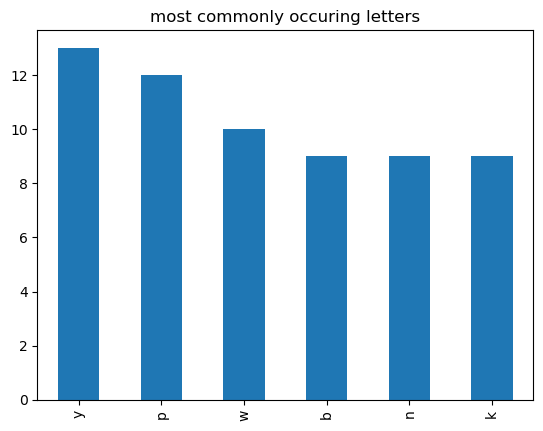

In [109]:
# most commonly occuring letters:
#
letters_s.value_counts().head(6).plot.bar(title = 'most commonly occuring letters').set(xlabel='letter')

### Use pandas to create a Series named numbers from the following list:



In [112]:
numbers = ['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']
numbers = pd.Series(numbers)
numbers.dtype


dtype('O')

#### 1. What is the data type of the numbers Series?

In [ ]:
number.size


#### 2. How many elements are in the number Series?

In [113]:
len(numbers)

20

In [ ]:
numbers.shape[0]

#### 3. Perform the necessary manipulations by accessing Series attributes and methods to convert the numbers Series to a numeric data type.

In [126]:
numbers = float(numbers[0].replace('$', '').replace(',',''))

In [ ]:
# without the regex argument, this gave a futureWarning about this function.
# the regex argument

In [119]:
numbers.str.replace('$','', regex=False).str.replace(',','', regex=False).astype(float)

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

#### 4. Run the code to discover the maximum value from the Series.

In [127]:
numbers.max()

AttributeError: 'float' object has no attribute 'max'

#### 5. Run the code to discover the minimum value from the Series.

In [128]:
numbers.min()

AttributeError: 'float' object has no attribute 'min'

In [122]:
numbers.nsmallest(1, keep='all')

TypeError: Cannot use method 'nsmallest' with dtype object

#### 6. What is the range of the values in the Series?

In [124]:
numbers.max() - numbers.min()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### 7. Bin the data into 4 equally sized intervals or bins and output how many values fall into each bin.



In [125]:
numbers.value_counts(bins=4)

TypeError: bins argument only works with numeric data.

#### 8. Plot the binned data in a meaningful way. Be sure to include a title and axis labels.

In [129]:
pd.cut(numbers, 4).value_counts().plot.barh(
    'title'='Value counts of Numerical Bins').set(
    xlabel='Count of Instances', ylabel='Value Bins in USD')

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (214003021.py, line 2)

### Use pandas to create a Series named exam_scores from the following list:

In [131]:
exam_scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

#### 1. How many elements are in the exam_scores Series?

#### 2. Run the code to discover the minimum, the maximum, the mean, and the median scores for the exam_scores Series.



#### 3. Plot the Series in a meaningful way and make sure your chart has a title and axis labels.

[Text(0.5, 0, 'Grade Bins'), Text(0, 0.5, 'Student Count')]

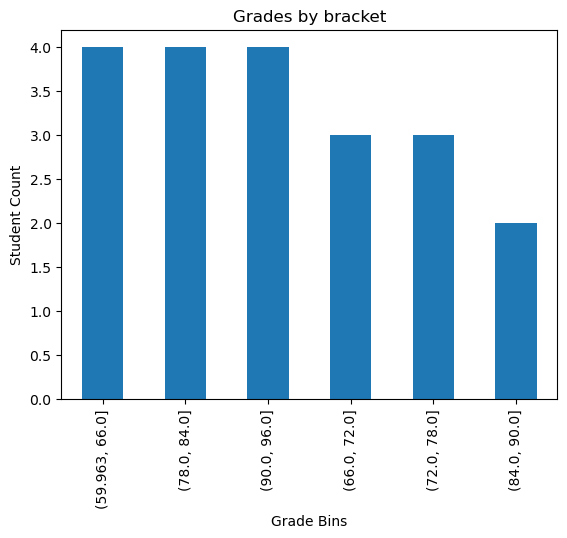

In [132]:
exam_scores.value_counts(
bins=6).plot.bar(
title='Grades by bracket').set(
xlabel='Grade Bins', ylabel ='Student Count')

#### 4. Write the code necessary to implement a curve for your exam_grades Series and save this as curved_grades. Add the necessary points to the highest grade to make it 100, and add the same number of points to every other score in the Series as well.



<AxesSubplot:title={'center':'Grade Distributions'}, ylabel='Frequency'>

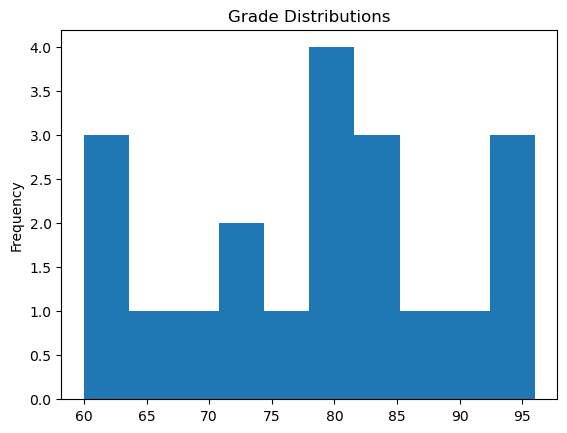

In [134]:
exam_scores.plot.hist(title='Grade Distributions')

#### 5. Use a method to convert each of the numeric values in the curved_grades Series into a categorical value of letter grades. For example, 86 should be a 'B' and 95 should be an 'A'. Save this as a Series named letter_grades.



In [142]:
# I want to bump thehighest score to a 100
#add that same value to therest of thegrades
curved_grades = exam_scores + (100 - exam_scores.max())
curved_grades

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

#### 6. Plot your new categorical letter_grades Series in a meaninful way and include a title and axis labels.

In [144]:
letter_grades = pd.cut(curved_grades,
       bins=[0,70,80,90,100], 
       labels=['F', 'C' ,'B', 'A'])
letter_grades

0     F
1     B
2     C
3     F
4     A
5     C
6     F
7     B
8     A
9     B
10    F
11    C
12    C
13    B
14    A
15    B
16    B
17    A
18    B
19    B
dtype: category
Categories (4, object): ['F' < 'C' < 'B' < 'A']

[Text(0.5, 0, 'Number of Students'), Text(0, 0.5, 'Letter Grade')]

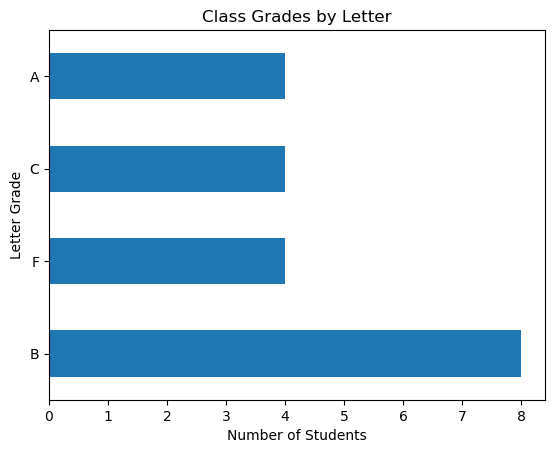

In [145]:
letter_grades.value_counts().plot.barh(
    title='Class Grades by Letter').set(
    xlabel='Number of Students', ylabel='Letter Grade')